In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_data.csv", parse_dates=['timestamp','signup_date'])
df.head()

,customer_id,location,gender,signup_date,sale_id,product_id,timestamp,quantity,price,revenue,name,category,supplier,customer_lifetime_value,timestamp_last,days_since_last_purchase
0,1,Ibadan,Male,2020-12-25,164,56,2023-09-08,4,8313,33252,Product_56,Groceries,Supplier A,692985,2023-09-08,114
1,1,Ibadan,Male,2020-12-25,424,28,2022-11-19,4,27160,108640,Product_28,Groceries,Supplier D,692985,2023-09-08,114
2,1,Ibadan,Male,2020-12-25,498,44,2021-11-30,2,24321,48642,Product_44,Books,Supplier B,692985,2023-09-08,114
3,1,Ibadan,Male,2020-12-25,586,41,2021-11-22,4,11883,47532,Product_41,Groceries,Supplier D,692985,2023-09-08,114
4,1,Ibadan,Male,2020-12-25,841,68,2021-10-08,1,14788,14788,Product_68,Electronics,Supplier A,692985,2023-09-08,114


In [ ]:

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M')

monthly_trend = df.pivot_table(
    values='revenue',
    index='month',
    aggfunc='sum'
)

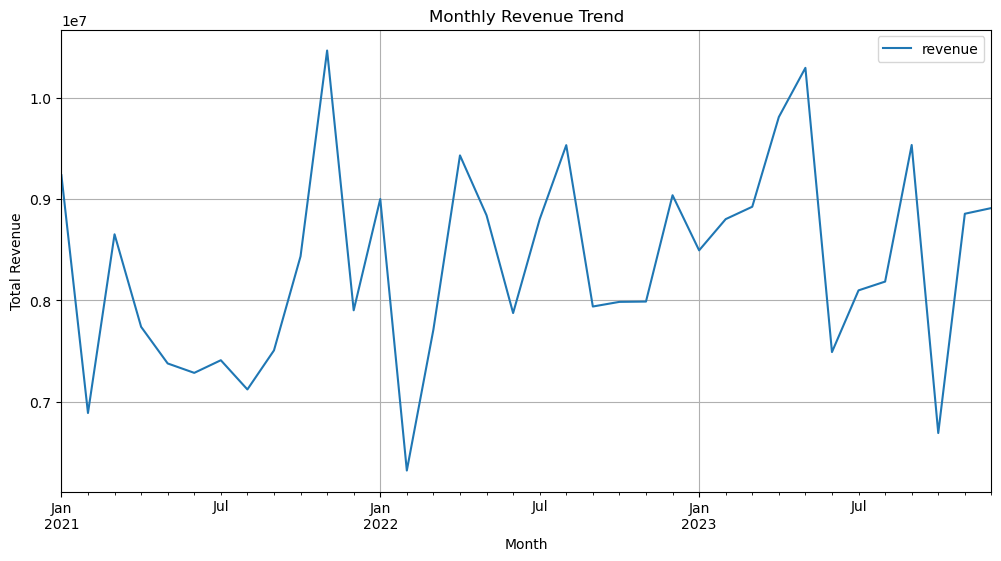

In [ ]:
monthly_trend.plot(kind='line', figsize=(12,6), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

In [7]:
top_cat = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
top_cat.plot(kind='bar')
plt.title("Top Categories by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("reports/figures/Top Categories.png")
plt.close()


In [8]:
top_sup = df.groupby('supplier')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_sup.plot(kind='bar')
plt.title("Top Suppliers by Revenue (Top 10)")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("reports/figures/Top Suppliers.png")
plt.close()


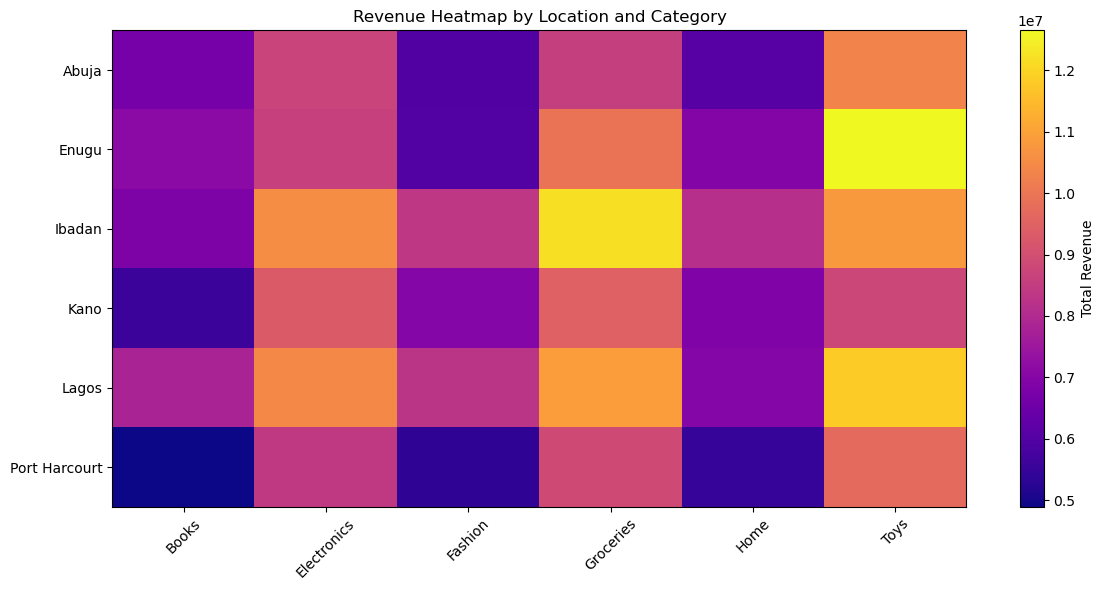

In [15]:
pivot = df.pivot_table(
    values='revenue',
    index='location',
    columns='category',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 6))
plt.imshow(pivot, aspect='auto', cmap='plasma')
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label="Total Revenue")
plt.title("Revenue Heatmap by Location and Category")
plt.savefig("reports/figures/Revenue Heatmap.png")
plt.tight_layout()
plt.show()

In [34]:
last_purchase = (
    df.groupby('customer_id')["days_since_last_purchase"]
      .max()
      .reset_index()
)

In [35]:
last_purchase['is_churn'] = (last_purchase["days_since_last_purchase"] > 90).astype(int)
df = df.merge(last_purchase[['customer_id', 'is_churn']], on='customer_id', how='left')
df.head()

,customer_id,location,gender,signup_date,sale_id,product_id,timestamp,quantity,price,revenue,name,category,supplier,customer_lifetime_value,timestamp_last,days_since_last_purchase,is_churn
0,1,Ibadan,Male,2020-12-25,164,56,2023-09-08,4,8313,33252,Product_56,Groceries,Supplier A,692985,2023-09-08,114,1
1,1,Ibadan,Male,2020-12-25,424,28,2022-11-19,4,27160,108640,Product_28,Groceries,Supplier D,692985,2023-09-08,114,1
2,1,Ibadan,Male,2020-12-25,498,44,2021-11-30,2,24321,48642,Product_44,Books,Supplier B,692985,2023-09-08,114,1
3,1,Ibadan,Male,2020-12-25,586,41,2021-11-22,4,11883,47532,Product_41,Groceries,Supplier D,692985,2023-09-08,114,1
4,1,Ibadan,Male,2020-12-25,841,68,2021-10-08,1,14788,14788,Product_68,Electronics,Supplier A,692985,2023-09-08,114,1


In [37]:
df['timestamp_last'] = pd.to_datetime(df['timestamp_last'])

monthly_churn = (
    df.groupby(df['timestamp_last'].dt.to_period('M'))['is_churn']
      .sum()
      .reset_index()
)

# Convert Period → Timestamp for plotting
monthly_churn['timestamp_last'] = monthly_churn['timestamp_last'].dt.to_timestamp()



In [38]:
plt.figure(figsize=(12,6))
plt.plot(monthly_churn['timestamp_last'], monthly_churn['is_churn'])

plt.title("Customer Churn Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Churned Customers")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("reports/figures/churn_over_time.png")
plt.close()
